In [1]:
import RFmodel
import FileProcessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
model = RFmodel.ModelClass()                 
fileProcessing=FileProcessing.FileProcessing()

In [3]:
file_name='Cleaned_NGSIM_Data'
ngsim1=fileProcessing.read_input(file_name)  

original File path: c:\Users\rakes\car following model\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\rakes\car following model\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [4]:
ngsim1.columns

Index(['Vehicle_ID', 'Frame_ID', 'Global_Time', 'Local_X', 'Local_Y',
       'v_length', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceding',
       'Following', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'Front_To_Rear_Time_Headway', 'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'v_Class_Name', 'Vehicle_combination', 'preceding_vehicle_length',
       'lane_changes', 'Prec_Vehicle_ID', 'preceding_Vehicle_Velocity',
       'preceding_Vehicle_Acceleration', 'preceding_car_lane_changes',
       'preceding_Local_Y', 'preceding_v_Class', 'pair_Time_Duration',
       'total_pair_duration'],
      dtype='object')

In [5]:
ngsim = model.preprocessing(ngsim1,0.1)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
p= model.prediction_test_pairs(test,0,6)
print(p)
F = model.prediction(test,p,rf,0.1)

['13-22', '10-12', '23-27', '39-43', '76-83', '84-94']
j: 0 input:[[12.489688  2.        2.       -1.018032  9.424416]],subject localy:10.498836,preceding_local_y:27.5106384,spacing:12.489688 pred_acc: 0.25158192000000007
j: 1 input:[[12.58047969  2.          2.         -0.99287381  9.44957419]],subject localy:11.4425355096,preceding_local_y:28.5442152,spacing:12.580479690399997 pred_acc: 0.5556707200000005
j: 2 input:[[12.67394072  2.          2.         -1.01350674  9.50514126]],subject localy:12.3902712824,preceding_local_y:29.585412,spacing:12.6739407176 pred_acc: -0.5279542399999995
j: 3 input:[[12.78829436  2.          2.         -1.16993416  9.45234584]],subject localy:13.3381456376,preceding_local_y:30.64764,spacing:12.788294362399999 pred_acc: 0.7914233599999991
j: 4 input:[[12.91077946  2.          2.         -1.13651182  9.53148818]],subject localy:14.2873373384,preceding_local_y:31.7193168,spacing:12.9107794616 pred_acc: 0.1713585599999999
j: 5 input:[[13.02326905  2.      

In [6]:
F.columns

Index(['Vehicle_ID', 'Frame_ID', 'Global_Time', 'Local_X', 'Local_Y',
       'v_length', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceding',
       'Following', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'Front_To_Rear_Time_Headway', 'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'v_Class_Name', 'Vehicle_combination', 'preceding_vehicle_length',
       'lane_changes', 'Prec_Vehicle_ID', 'preceding_Vehicle_Velocity',
       'preceding_Vehicle_Acceleration', 'preceding_car_lane_changes',
       'preceding_Local_Y', 'preceding_v_Class', 'pair_Time_Duration',
       'total_pair_duration', 'nextframeAcc', 'nextframesvel',
       'nextframeposition', 'nextframespace', 'Pair_Time_Duration',
       'PrecVehType', 'Vehicle.type', 'predicted_acceleration',
       'predicted_velocity', 'predicted_spacing'],
      dtype='object')

In [7]:
F['L-F_Pair'].unique()

array(['13-22', '10-12', '23-27', '39-43', '76-83', '84-94'], dtype=object)

In [9]:
F

Vehicle_ID  Frame_ID    Global_Time   Local_X     Local_Y  v_length  \
25             22        37  1118846982600  4.602175   10.498836    5.0292   
26             22        38  1118846982700  4.596994   11.565636    5.0292   
29             22        39  1118846982800  4.591202   12.632436    5.0292   
30             22        40  1118846982900  4.586935   13.547141    5.0292   
33             22        41  1118846983000  4.581144   14.613941    5.0292   
...           ...       ...            ...       ...         ...       ...   
15537          94       663  1118847045200  6.607150  615.735319    4.4196   
15574          94       664  1118847045300  6.617513  617.428483    4.4196   
15654          94       665  1118847045400  6.628181  619.120123    4.4196   
15703          94       666  1118847045500  6.638544  620.813287    4.4196   
15737          94       667  1118847045600  6.644030  622.506146    4.4196   

       v_Class      v_Vel     v_Acc  Lane_ID  ...  nextframeAcc  \
25           2   9.424416  0.000000        2  ...      0.000000   
26           2   9.424416  0.000000        2  ...      0.000000   
29           2   9.424416  0.000000        2  ...      0.000000   
30           2   9.424416  0.000000        2  ...      0.000000   
33           2   9.424416  0.000000        2  ...     -2.511552   
...        ...        ...       ...      ...  ...           ...   
15537        2  16.925544  0.012192        2  ...     -0.045720   
15574        2  16.925544 -0.045720        2  ...      0.015240   
15654        2  16.922496  0.015240        2  ...     -0.106680   
15703        2  16.916400 -0.106680        2  ...     -0.374904   
15737        2  16.888968 -0.374904        2  ...     -1.283208   

       nextframesvel  nextframeposition  nextframespace Pair_Time_Duration  \
25          9.424416          11.565636       12.456160                0.1   
26          9.424416          12.632436       12.431776                0.2   
29          9.424416          13.547141       12.578080                0.3   
30          9.424416          14.613941       12.584176                0.4   
33          9.424416          15.530170       12.733528                0.5   
...              ...                ...             ...                ...   
15537      16.925544         617.428483       19.537680               43.9   
15574      16.922496         619.120123       19.501104               44.0   
15654      16.916400         620.813287       19.464528               44.1   
15703      16.888968         622.506146       19.275552               44.2   
15737      16.800576         624.199310       19.107912               44.3   

      PrecVehType  Vehicle.type  predicted_acceleration  predicted_velocity  \
25              2             2                0.104750            9.424416   
26              2             2                0.483494            9.434891   
29              2             2                0.108448            9.483240   
30              2             2               -0.014407            9.494085   
33              2             2                0.764093            9.492644   
...           ...           ...                     ...                 ...   
15537           2             2               -0.215758           15.834951   
15574           2             2               -0.258125           15.813375   
15654           2             2                0.637418           15.787563   
15703           2             2                1.503233           15.851305   
15737           2             2                0.436352           16.001628   

       predicted_spacing  
25             12.489688  
26             12.581214  
29             12.676504  
30             12.789866  
33             12.912206  
...                  ...  
15537          20.107066  
15574          20.196477  
15654          20.272104  
15703          20.347054  
15737          20.258900  

[2694 rows x 43 columns]

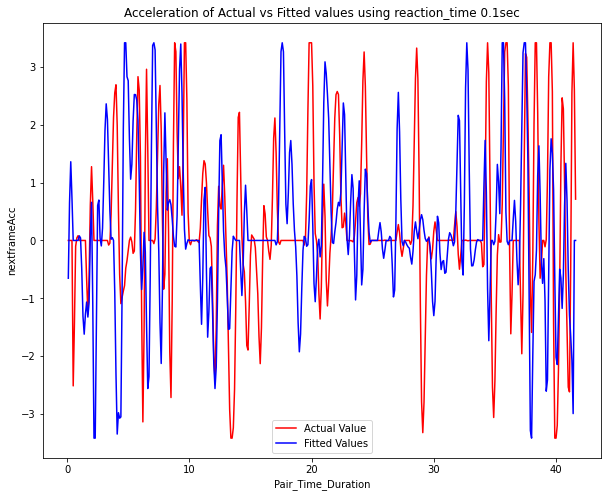

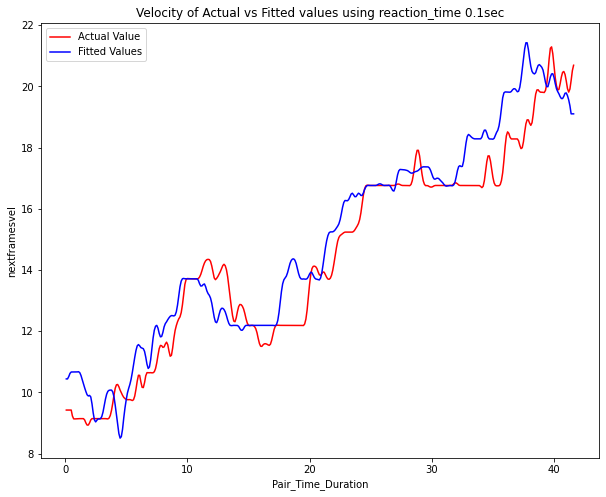

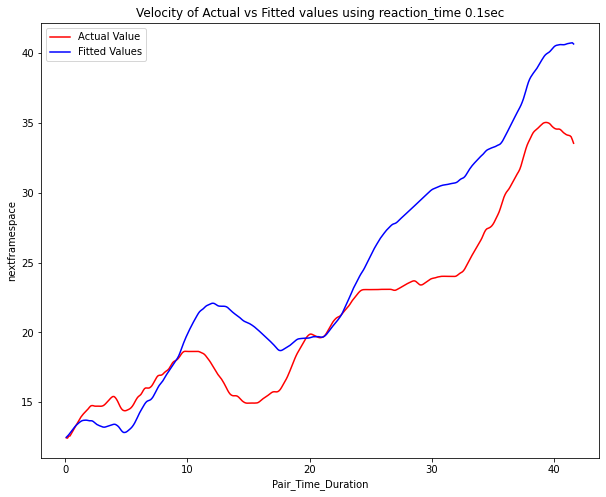

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
F1 = F[F["L-F_Pair"] == "13-22"]
model.plot_1(F1,'nextframeAcc','preceding_Vehicle_Acceleration','Acceleration of Actual vs Fitted values using reaction_time 0.1sec')
model.plot_1(F1,'nextframesvel','preceding_Vehicle_Velocity', 'Velocity of Actual vs Fitted values using reaction_time 0.1sec')
model.plot_1(F1,'nextframespace','predicted_spacing', 'Velocity of Actual vs Fitted values using reaction_time 0.1sec')

In [7]:
ngsim = model.preprocessing(ngsim1,0.4)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
p= model.prediction_test_pairs(test,0,6)
print(p)
#F = model.prediction(test,p,'nextframeAcc',rf,0.4)
F = model.prediction(test,p,rf,0.4)

['13-22', '10-12', '23-27', '39-43', '76-83', '84-94']
j: 0 input:[[12.489688  2.        2.       -1.018032  9.424416]],subject localy:10.498836,preceding_local_y:27.5106384,spacing:12.489688 pred_acc: 0.6213652799999998
j: 1 input:[[ 9.70470358  2.          2.         -0.76948589  9.67296211]],subject localy:14.318311622400001,preceding_local_y:28.5442152,spacing:9.704703577599998 pred_acc: 0.17877536000000016
j: 2 input:[[ 9.77771029  2.          2.         -0.82780835  9.69083965]],subject localy:15.286501710400001,preceding_local_y:29.585412,spacing:9.7777102896 pred_acc: 0.046410880000000126
j: 3 input:[[ 9.87062227  2.          2.         -0.92679926  9.69548074]],subject localy:16.2558177296,preceding_local_y:30.64764,spacing:9.870622270399998 pred_acc: 0.2936036799999999
j: 4 input:[[ 9.97128298  2.          2.         -0.9431589   9.7248411 ]],subject localy:17.2268338216,preceding_local_y:31.7193168,spacing:9.971282978400001 pred_acc: 0.09454896000000003
j: 5 input:[[10.06482

In [16]:
F['L-F_Pair'].unique()

array(['13-22', '10-12', '23-27', '39-43', '76-83', '84-94'], dtype=object)

In [22]:
F1

Vehicle_ID  Frame_ID    Global_Time   Local_X     Local_Y  v_length  \
25            22        37  1118846982600  4.602175   10.498836    5.0292   
26            22        38  1118846982700  4.596994   11.565636    5.0292   
29            22        39  1118846982800  4.591202   12.632436    5.0292   
30            22        40  1118846982900  4.586935   13.547141    5.0292   
33            22        41  1118846983000  4.581144   14.613941    5.0292   
...          ...       ...            ...       ...         ...       ...   
7493          22       448  1118847023700  5.931103  600.546526    5.0292   
7517          22       449  1118847023800  5.895137  602.514010    5.0292   
7585          22       450  1118847023900  5.936590  604.474483    5.0292   
7601          22       451  1118847024000  6.005474  606.473057    5.0292   
7639          22       452  1118847024100  6.083808  608.513998    5.0292   

      v_Class      v_Vel     v_Acc  Lane_ID  ...  nextframeAcc  nextframesvel  \
25          2   9.424416  0.000000        2  ...      0.000000       9.424416   
26          2   9.424416  0.000000        2  ...      0.000000       9.424416   
29          2   9.424416  0.000000        2  ...      0.000000       9.424416   
30          2   9.424416  0.000000        2  ...      0.000000       9.424416   
33          2   9.424416  0.000000        2  ...     -2.511552       9.424416   
...       ...        ...       ...      ...  ...           ...            ...   
7493        2  19.930872 -2.615184        2  ...     -0.475488      19.815048   
7517        2  19.815048 -0.475488        2  ...      2.551176      19.915632   
7585        2  19.915632  2.551176        2  ...      3.413760      20.199096   
7601        2  20.199096  3.413760        2  ...      2.599944      20.516088   
7639        2  20.516088  2.599944        2  ...      0.713232      20.692872   

      nextframeposition  nextframespace Pair_Time_Duration PrecVehType  \
25            11.565636       12.456160                0.1           2   
26            12.632436       12.431776                0.2           2   
29            13.547141       12.578080                0.3           2   
30            14.613941       12.584176                0.4           2   
33            15.530170       12.733528                0.5           2   
...                 ...             ...                ...         ...   
7493         602.514010       34.106104               41.2           2   
7517         604.474483       34.078672               41.3           2   
7585         606.473057       34.002472               41.4           2   
7601         608.513998       33.789112               41.5           2   
7639         610.592124       33.542224               41.6           2   

      Vehicle.type  predicted_acceleration  predicted_velocity  \
25               2                0.104750            9.424416   
26               2                0.483494            9.434891   
29               2                0.108448            9.483240   
30               2               -0.014407            9.494085   
33               2                0.764093            9.492644   
...            ...                     ...                 ...   
7493             2                1.340957           18.918568   
7517             2                0.192268           19.052664   
7585             2               -0.964712           19.071891   
7601             2               -0.014834           18.975420   
7639             2                0.032370           18.973936   

      predicted_spacing  
25            12.489688  
26            12.581214  
29            12.676504  
30            12.789866  
33            12.912206  
...                 ...  
7493          46.193849  
7517          46.246617  
7585          46.272212  
7601          46.292524  
7639          46.223857  

[416 rows x 43 columns]

In [21]:
F2

Vehicle_ID  Frame_ID    Global_Time   Local_X     Local_Y  v_length  \
25            22        37  1118846982600  4.602175   10.498836    5.0292   
26            22        38  1118846982700  4.596994   11.565636    5.0292   
29            22        39  1118846982800  4.591202   12.632436    5.0292   
30            22        40  1118846982900  4.586935   13.547141    5.0292   
33            22        41  1118846983000  4.581144   14.613941    5.0292   
...          ...       ...            ...       ...         ...       ...   
7382          22       445  1118847023400  6.006084  594.449306    5.0292   
7431          22       446  1118847023500  6.011266  596.503049    5.0292   
7451          22       447  1118847023600  5.978042  598.541551    5.0292   
7493          22       448  1118847023700  5.931103  600.546526    5.0292   
7517          22       449  1118847023800  5.895137  602.514010    5.0292   

      v_Class      v_Vel     v_Acc  Lane_ID  ...  nextframeAcc  nextframesvel  \
25          2   9.424416  0.000000        2  ...      0.000000       9.424416   
26          2   9.424416  0.000000        2  ...     -2.511552       9.424416   
29          2   9.424416  0.000000        2  ...     -1.438656       9.229344   
30          2   9.424416  0.000000        2  ...     -0.100584       9.137904   
33          2   9.424416  0.000000        2  ...      0.045720       9.134856   
...       ...        ...       ...      ...  ...           ...            ...   
7382        2  20.488656 -0.545592        2  ...     -0.475488      19.815048   
7431        2  20.394168 -1.545336        2  ...      2.551176      19.915632   
7451        2  20.180808 -2.532888        2  ...      3.413760      20.199096   
7493        2  19.930872 -2.615184        2  ...      2.599944      20.516088   
7517        2  19.815048 -0.475488        2  ...      0.713232      20.692872   

      nextframeposition  nextframespace Pair_Time_Duration PrecVehType  \
25            14.613941       12.584176                0.1           2   
26            15.530170       12.733528                0.2           2   
29            16.454323       12.876784                0.3           2   
30            17.359579       13.038328                0.4           2   
33            18.271846       13.193776                0.5           2   
...                 ...             ...                ...         ...   
7382         602.514010       34.106104               40.9           2   
7431         604.474483       34.078672               41.0           2   
7451         606.473057       34.002472               41.1           2   
7493         608.513998       33.789112               41.2           2   
7517         610.592124       33.542224               41.3           2   

      Vehicle.type  predicted_acceleration  predicted_velocity  \
25               2                0.690839            9.424416   
26               2               -1.080658            9.700752   
29               2                0.683992            9.268488   
30               2                0.566826            9.542085   
33               2               -1.046346            9.768816   
...            ...                     ...                 ...   
7382             2                0.165852           19.641401   
7431             2                0.261701           19.707742   
7451             2                0.347411           19.812423   
7493             2               -0.376895           19.951387   
7517             2               -0.530535           19.800629   

      predicted_spacing  
25            12.489688  
26             9.699146  
29             6.946494  
30             4.246608  
33             1.456104  
...                 ...  
7382       -1591.729164  
7431       -1597.609258  
7451       -1603.531786  
7493       -1609.518283  
7517       -1615.517357  

[413 rows x 43 columns]

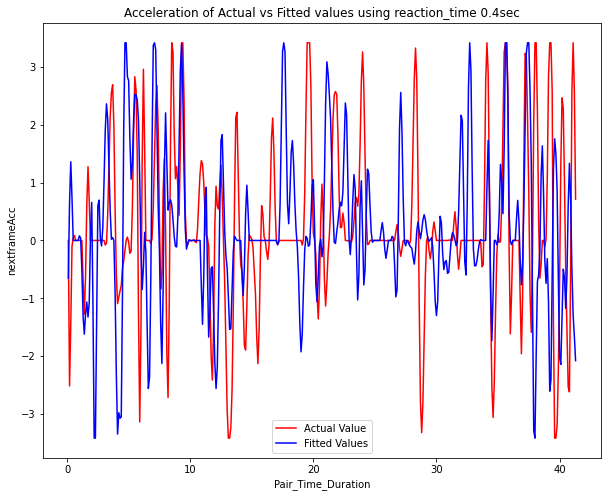

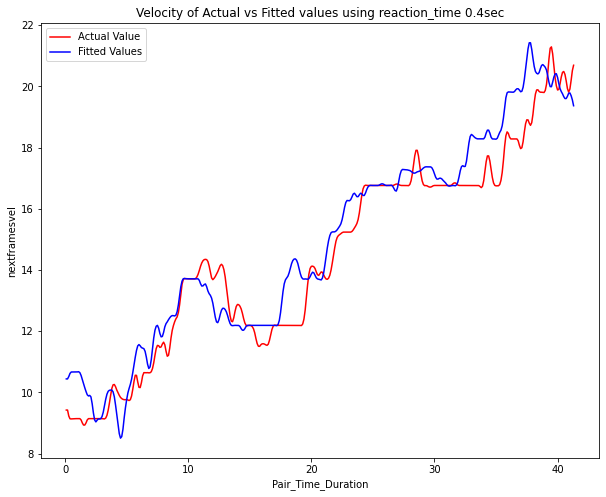

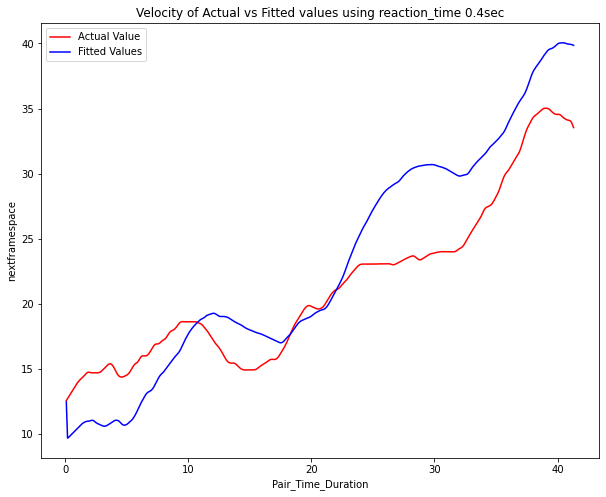

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
F2 = F[F["L-F_Pair"] == "13-22"]
#model.plot_1(F2,'nextframeAcc','pacc','Acceleration of Actual vs Fitted values using reaction_time 0.4sec')
model.plot_1(F2,'nextframeAcc','preceding_Vehicle_Acceleration','Acceleration of Actual vs Fitted values using reaction_time 0.4sec')
model.plot_1(F2,'nextframesvel','preceding_Vehicle_Velocity', 'Velocity of Actual vs Fitted values using reaction_time 0.4sec')
model.plot_1(F2,'nextframespace','predicted_spacing', 'Velocity of Actual vs Fitted values using reaction_time 0.4sec')

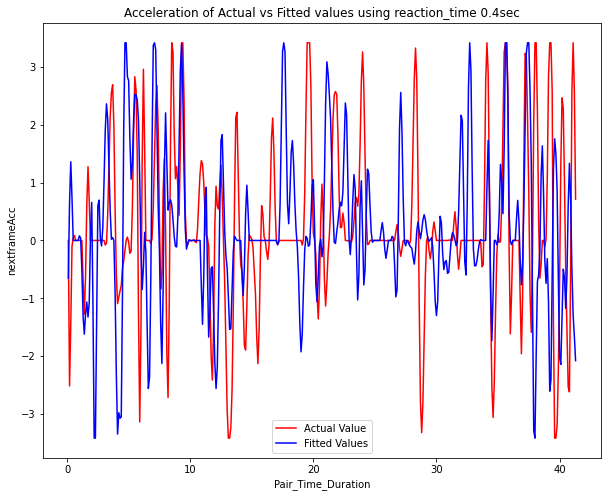

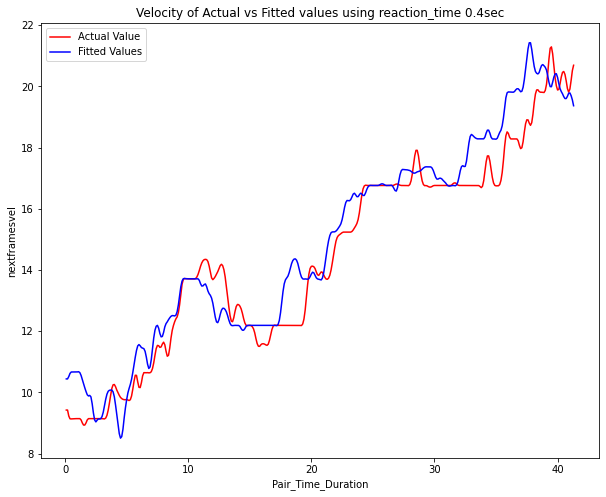

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
F2 = F[F["L-F_Pair"] == "13-22"]
#model.plot_1(F2,'nextframeAcc','pacc','Acceleration of Actual vs Fitted values using reaction_time 0.4sec')
model.plot_1(F2,'nextframeAcc','preceding_Vehicle_Acceleration','Acceleration of Actual vs Fitted values using reaction_time 0.4sec')
model.plot_1(F2,'nextframesvel','preceding_Vehicle_Velocity', 'Velocity of Actual vs Fitted values using reaction_time 0.4sec')

In [ ]:
ngsim = model.preprocessing(ngsim1,0.5)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
p= model.prediction_test_pairs(test,0,6)
print(p)
F = model.prediction(test,p,'nextframeAcc',rf,0.5)

['1978-1984', '1987-1996', '2162-2170', '2190-2200', '2194-2207', '2399-2419']


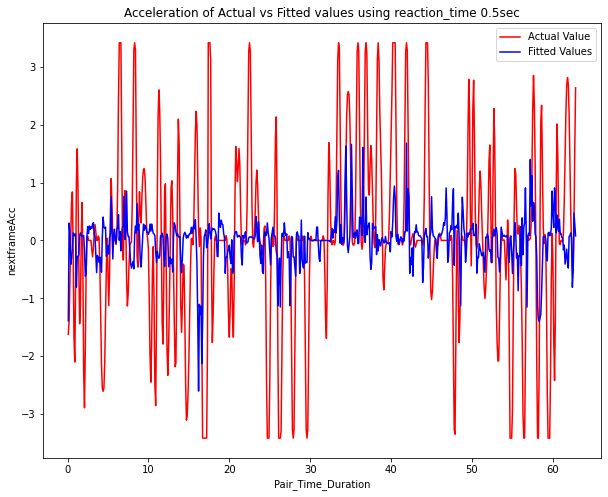

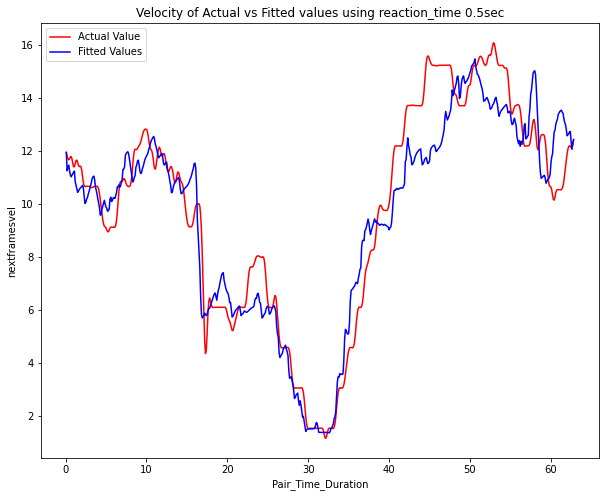

<module 'matplotlib.pyplot' from 'c:\\Users\\neels\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [ ]:
F1 = F[F["L-F_Pair"] == "1978-1984"]
model.plot_1(F1,'nextframeAcc','pacc','Acceleration of Actual vs Fitted values using reaction_time 0.5sec')
model.plot_1(F1,'nextframesvel','pvel', 'Velocity of Actual vs Fitted values using reaction_time 0.5sec')

In [9]:
ngsim = model.preprocessing(ngsim1,0.8)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
p= model.prediction_test_pairs(test,0,6)
print(p)
F = model.prediction(test,p,rf,0.8)

['13-22', '10-12', '23-27', '39-43', '76-83', '84-94']
j: 0 input:[[12.489688  2.        2.       -1.018032  9.424416]],subject localy:10.498836,preceding_local_y:27.5106384,spacing:12.489688 pred_acc: 0.33371535999999996
j: 1 input:[[ 5.87785748  2.          2.         -0.75105971  9.69138829]],subject localy:18.1451577152,preceding_local_y:28.5442152,spacing:5.8778574848 pred_acc: 0.032769386666666685
j: 2 input:[[ 5.94975161  2.          2.         -0.82398277  9.69466523]],subject localy:19.114460390933335,preceding_local_y:29.585412,spacing:5.9497516090666664 pred_acc: -0.03094735999999997
j: 3 input:[[ 6.04266782  2.          2.         -0.93070951  9.69157049]],subject localy:20.0837721768,preceding_local_y:30.64764,spacing:6.042667823199999 pred_acc: 0.18438367999999997
j: 4 input:[[ 6.14426566  2.          2.         -0.95799114  9.71000886]],subject localy:21.053851144266666,preceding_local_y:31.7193168,spacing:6.144265655733335 pred_acc: 0.38508431999999987
j: 5 input:[[ 6.2

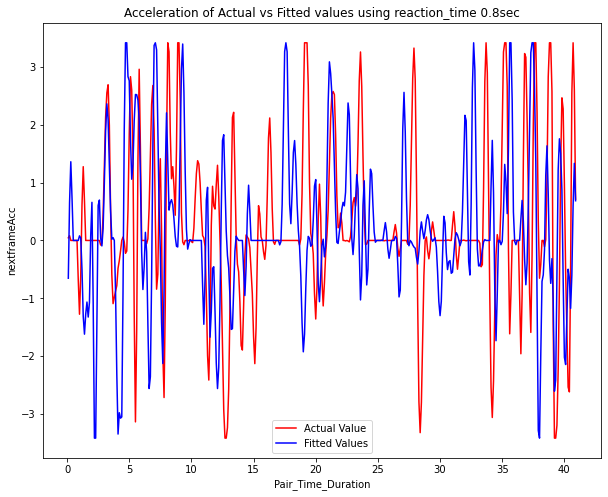

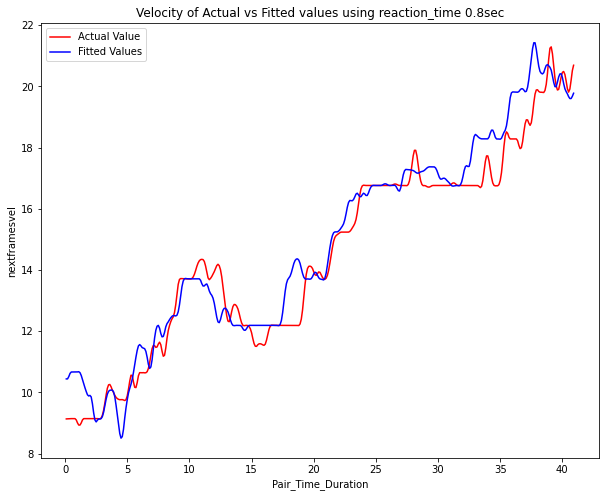

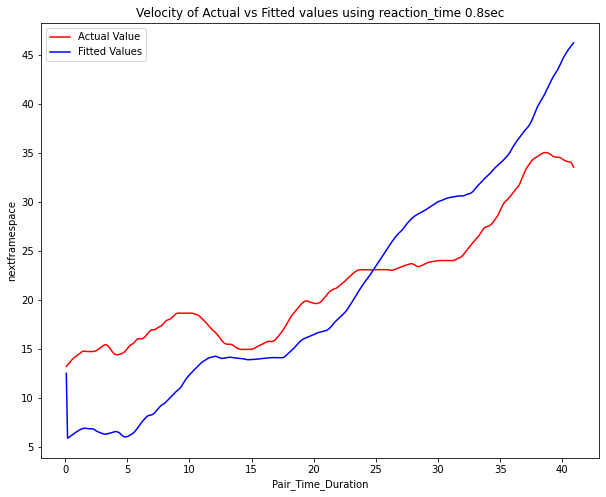

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [10]:
F3 = F[F["L-F_Pair"] == "13-22"]
model.plot_1(F3,'nextframeAcc','preceding_Vehicle_Acceleration','Acceleration of Actual vs Fitted values using reaction_time 0.8sec')
model.plot_1(F3,'nextframesvel','preceding_Vehicle_Velocity', 'Velocity of Actual vs Fitted values using reaction_time 0.8sec')
model.plot_1(F3,'nextframespace','predicted_spacing', 'Velocity of Actual vs Fitted values using reaction_time 0.8sec')

<Figure size 720x1080 with 0 Axes>

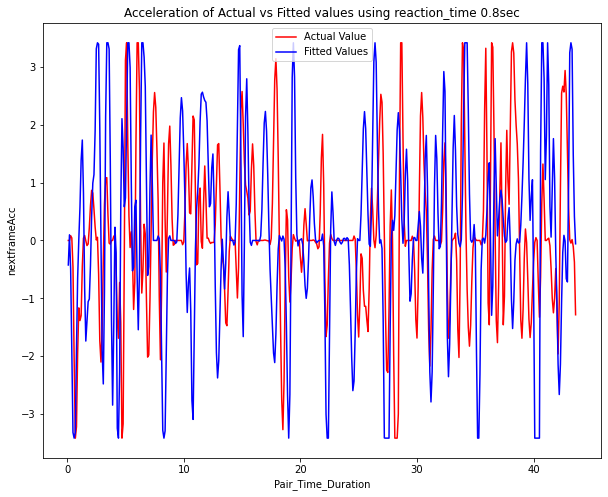

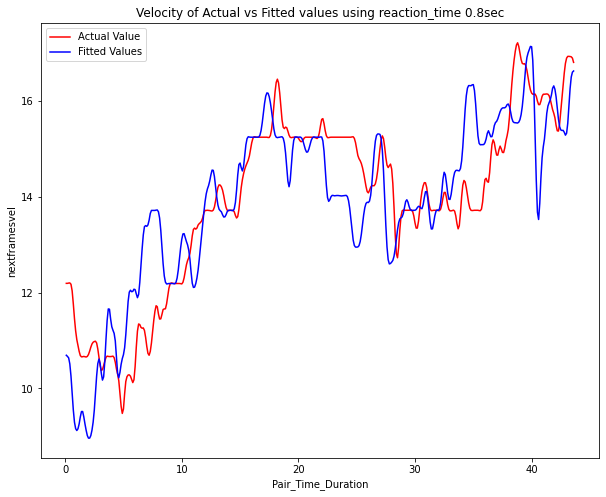

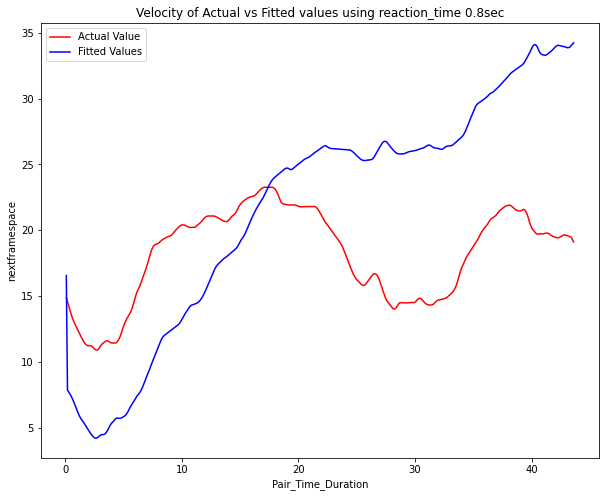

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [22]:
# '13-22', '10-12', '23-27', '39-43', '76-83', '84-94'
F4 = F[F["L-F_Pair"] == "84-94"]
model.plot_1(F4,'nextframeAcc','preceding_Vehicle_Acceleration','Acceleration of Actual vs Fitted values using reaction_time 0.8sec')
model.plot_1(F4,'nextframesvel','preceding_Vehicle_Velocity', 'Velocity of Actual vs Fitted values using reaction_time 0.8sec')
model.plot_1(F4,'nextframespace','predicted_spacing', 'Velocity of Actual vs Fitted values using reaction_time 0.8sec')

In [ ]:
ngsim = model.preprocessing(ngsim1,1)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
p= model.prediction_test_pairs(test,0,6)
print(p)
F = model.prediction(test,p,'nextframeAcc',rf,1)

['1978-1984', '1987-1996', '2162-2170', '2190-2200', '2194-2207', '2399-2419']


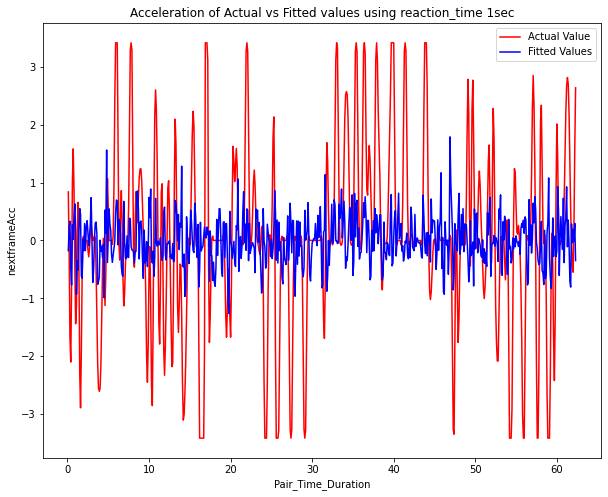

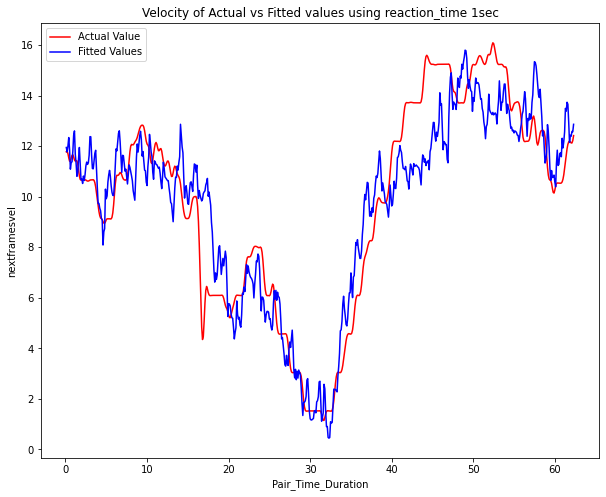

<module 'matplotlib.pyplot' from 'c:\\Users\\neels\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [ ]:
F1 = F[F["L-F_Pair"] == "1978-1984"]
model.plot_1(F1,'nextframeAcc','pacc','Acceleration of Actual vs Fitted values using reaction_time 1sec')
model.plot_1(F1,'nextframesvel','pvel', 'Velocity of Actual vs Fitted values using reaction_time 1sec')

# Keeping delta_time in RFmodel

In [8]:
F1

Vehicle_ID  Frame_ID    Global_Time   Local_X     Local_Y  v_length  \
25            22        37  1118846982600  4.602175   10.498836    5.0292   
26            22        38  1118846982700  4.596994   11.565636    5.0292   
29            22        39  1118846982800  4.591202   12.632436    5.0292   
30            22        40  1118846982900  4.586935   13.547141    5.0292   
33            22        41  1118846983000  4.581144   14.613941    5.0292   
...          ...       ...            ...       ...         ...       ...   
7493          22       448  1118847023700  5.931103  600.546526    5.0292   
7517          22       449  1118847023800  5.895137  602.514010    5.0292   
7585          22       450  1118847023900  5.936590  604.474483    5.0292   
7601          22       451  1118847024000  6.005474  606.473057    5.0292   
7639          22       452  1118847024100  6.083808  608.513998    5.0292   

      v_Class      v_Vel     v_Acc  Lane_ID  ...  nextframeAcc  nextframesvel  \
25          2   9.424416  0.000000        2  ...      0.000000       9.424416   
26          2   9.424416  0.000000        2  ...      0.000000       9.424416   
29          2   9.424416  0.000000        2  ...      0.000000       9.424416   
30          2   9.424416  0.000000        2  ...      0.000000       9.424416   
33          2   9.424416  0.000000        2  ...     -2.511552       9.424416   
...       ...        ...       ...      ...  ...           ...            ...   
7493        2  19.930872 -2.615184        2  ...     -0.475488      19.815048   
7517        2  19.815048 -0.475488        2  ...      2.551176      19.915632   
7585        2  19.915632  2.551176        2  ...      3.413760      20.199096   
7601        2  20.199096  3.413760        2  ...      2.599944      20.516088   
7639        2  20.516088  2.599944        2  ...      0.713232      20.692872   

      nextframeposition  nextframespace Pair_Time_Duration PrecVehType  \
25            11.565636       12.456160                0.1           2   
26            12.632436       12.431776                0.2           2   
29            13.547141       12.578080                0.3           2   
30            14.613941       12.584176                0.4           2   
33            15.530170       12.733528                0.5           2   
...                 ...             ...                ...         ...   
7493         602.514010       34.106104               41.2           2   
7517         604.474483       34.078672               41.3           2   
7585         606.473057       34.002472               41.4           2   
7601         608.513998       33.789112               41.5           2   
7639         610.592124       33.542224               41.6           2   

      Vehicle.type  predicted_acceleration  predicted_velocity  \
25               2                0.075855            9.424416   
26               2                0.396809            9.432001   
29               2                0.024425            9.471682   
30               2               -0.139456            9.474125   
33               2               -0.873435            9.460179   
...            ...                     ...                 ...   
7493             2                0.762264           18.933654   
7517             2                1.362111           19.009880   
7585             2                0.466486           19.146092   
7601             2                0.292953           19.192740   
7639             2                0.595742           19.222036   

      predicted_spacing  
25            12.489688  
26            12.581358  
29            12.677371  
30            12.792309  
33            12.917270  
...                 ...  
7493          46.319703  
7517          46.373856  
7585          46.397880  
7601          46.403617  
7639          46.311678  

[416 rows x 43 columns]

In [11]:
F2

Vehicle_ID  Frame_ID    Global_Time   Local_X     Local_Y  v_length  \
25            22        37  1118846982600  4.602175   10.498836    5.0292   
26            22        38  1118846982700  4.596994   11.565636    5.0292   
29            22        39  1118846982800  4.591202   12.632436    5.0292   
30            22        40  1118846982900  4.586935   13.547141    5.0292   
33            22        41  1118846983000  4.581144   14.613941    5.0292   
...          ...       ...            ...       ...         ...       ...   
7382          22       445  1118847023400  6.006084  594.449306    5.0292   
7431          22       446  1118847023500  6.011266  596.503049    5.0292   
7451          22       447  1118847023600  5.978042  598.541551    5.0292   
7493          22       448  1118847023700  5.931103  600.546526    5.0292   
7517          22       449  1118847023800  5.895137  602.514010    5.0292   

      v_Class      v_Vel     v_Acc  Lane_ID  ...  nextframeAcc  nextframesvel  \
25          2   9.424416  0.000000        2  ...      0.000000       9.424416   
26          2   9.424416  0.000000        2  ...     -2.511552       9.424416   
29          2   9.424416  0.000000        2  ...     -1.438656       9.229344   
30          2   9.424416  0.000000        2  ...     -0.100584       9.137904   
33          2   9.424416  0.000000        2  ...      0.045720       9.134856   
...       ...        ...       ...      ...  ...           ...            ...   
7382        2  20.488656 -0.545592        2  ...     -0.475488      19.815048   
7431        2  20.394168 -1.545336        2  ...      2.551176      19.915632   
7451        2  20.180808 -2.532888        2  ...      3.413760      20.199096   
7493        2  19.930872 -2.615184        2  ...      2.599944      20.516088   
7517        2  19.815048 -0.475488        2  ...      0.713232      20.692872   

      nextframeposition  nextframespace Pair_Time_Duration PrecVehType  \
25            14.613941       12.584176                0.1           2   
26            15.530170       12.733528                0.2           2   
29            16.454323       12.876784                0.3           2   
30            17.359579       13.038328                0.4           2   
33            18.271846       13.193776                0.5           2   
...                 ...             ...                ...         ...   
7382         602.514010       34.106104               40.9           2   
7431         604.474483       34.078672               41.0           2   
7451         606.473057       34.002472               41.1           2   
7493         608.513998       33.789112               41.2           2   
7517         610.592124       33.542224               41.3           2   

      Vehicle.type  predicted_acceleration  predicted_velocity  \
25               2                0.566867            9.424416   
26               2                0.467197            9.651163   
29               2                0.455920            9.838042   
30               2                0.492049           10.020410   
33               2                0.262494           10.217229   
...            ...                     ...                 ...   
7382             2                0.070937           19.654638   
7431             2                0.222382           19.683012   
7451             2                0.467279           19.771965   
7493             2               -0.027310           19.958877   
7517             2               -1.188090           19.947953   

      predicted_spacing  
25            12.489688  
26             9.709063  
29             6.852419  
30             3.942957  
33             0.967106  
...                 ...  
7382       -1629.843273  
7431       -1635.721069  
7451       -1641.630560  
7493       -1647.610463  
7517       -1653.640499  

[413 rows x 43 columns]

In [16]:
F3

Vehicle_ID  Frame_ID    Global_Time   Local_X     Local_Y  v_length  \
25            22        37  1118846982600  4.602175   10.498836    5.0292   
26            22        38  1118846982700  4.596994   11.565636    5.0292   
29            22        39  1118846982800  4.591202   12.632436    5.0292   
30            22        40  1118846982900  4.586935   13.547141    5.0292   
33            22        41  1118846983000  4.581144   14.613941    5.0292   
...          ...       ...            ...       ...         ...       ...   
7234          22       441  1118847023000  6.052718  586.327606    5.0292   
7287          22       442  1118847023100  5.999683  588.316121    5.0292   
7327          22       443  1118847023200  5.974385  590.337859    5.0292   
7340          22       444  1118847023300  5.978347  592.388249    5.0292   
7382          22       445  1118847023400  6.006084  594.449306    5.0292   

      v_Class      v_Vel     v_Acc  Lane_ID  ...  nextframeAcc  nextframesvel  \
25          2   9.424416  0.000000        2  ...      0.045720       9.134856   
26          2   9.424416  0.000000        2  ...      0.082296       9.137904   
29          2   9.424416  0.000000        2  ...      0.000000       9.144000   
30          2   9.424416  0.000000        2  ...      0.000000       9.144000   
33          2   9.424416  0.000000        2  ...      0.000000       9.144000   
...       ...        ...       ...      ...  ...           ...            ...   
7234        2  19.903440  1.310640        2  ...     -0.475488      19.815048   
7287        2  20.086320  2.462784        2  ...      2.551176      19.915632   
7327        2  20.308824  2.270760        2  ...      3.413760      20.199096   
7340        2  20.461224  0.972312        2  ...      2.599944      20.516088   
7382        2  20.488656 -0.545592        2  ...      0.713232      20.692872   

      nextframeposition  nextframespace Pair_Time_Duration PrecVehType  \
25            18.271846       13.193776                0.1           2   
26            19.185026       13.346176                0.2           2   
29            20.100036       13.498576                0.3           2   
30            21.014436       13.657072                0.4           2   
33            21.928836       13.809472                0.5           2   
...                 ...             ...                ...         ...   
7234         602.514010       34.106104               40.5           2   
7287         604.474483       34.078672               40.6           2   
7327         606.473057       34.002472               40.7           2   
7340         608.513998       33.789112               40.8           2   
7382         610.592124       33.542224               40.9           2   

      Vehicle.type  predicted_acceleration  predicted_velocity  \
25               2                0.285374            9.424416   
26               2               -0.855960            9.652715   
29               2                0.649630            8.967948   
30               2                0.323088            9.487652   
33               2                0.495361            9.746122   
...            ...                     ...                 ...   
7234             2                0.098369           21.136773   
7287             2               -0.182819           21.215468   
7327             2                0.097109           21.069213   
7340             2                0.098369           21.146900   
7382             2                0.263957           21.225596   

      predicted_spacing  
25            12.489688  
26             5.893327  
29            -0.513742  
30            -6.833753  
33           -13.455586  
...                 ...  
7234       -4442.597529  
7287       -4457.580086  
7327       -4472.543543  
7340       -4487.472563  
7382       -4502.443409  

[409 rows x 43 columns]

# Keeping delta_time as 0.1 in RFmodel

In [11]:
F1

Vehicle_ID  Frame_ID    Global_Time   Local_X     Local_Y  v_length  \
25            22        37  1118846982600  4.602175   10.498836    5.0292   
26            22        38  1118846982700  4.596994   11.565636    5.0292   
29            22        39  1118846982800  4.591202   12.632436    5.0292   
30            22        40  1118846982900  4.586935   13.547141    5.0292   
33            22        41  1118846983000  4.581144   14.613941    5.0292   
...          ...       ...            ...       ...         ...       ...   
7493          22       448  1118847023700  5.931103  600.546526    5.0292   
7517          22       449  1118847023800  5.895137  602.514010    5.0292   
7585          22       450  1118847023900  5.936590  604.474483    5.0292   
7601          22       451  1118847024000  6.005474  606.473057    5.0292   
7639          22       452  1118847024100  6.083808  608.513998    5.0292   

      v_Class      v_Vel     v_Acc  Lane_ID  ...  nextframeAcc  nextframesvel  \
25          2   9.424416  0.000000        2  ...      0.000000       9.424416   
26          2   9.424416  0.000000        2  ...      0.000000       9.424416   
29          2   9.424416  0.000000        2  ...      0.000000       9.424416   
30          2   9.424416  0.000000        2  ...      0.000000       9.424416   
33          2   9.424416  0.000000        2  ...     -2.511552       9.424416   
...       ...        ...       ...      ...  ...           ...            ...   
7493        2  19.930872 -2.615184        2  ...     -0.475488      19.815048   
7517        2  19.815048 -0.475488        2  ...      2.551176      19.915632   
7585        2  19.915632  2.551176        2  ...      3.413760      20.199096   
7601        2  20.199096  3.413760        2  ...      2.599944      20.516088   
7639        2  20.516088  2.599944        2  ...      0.713232      20.692872   

      nextframeposition  nextframespace Pair_Time_Duration PrecVehType  \
25            11.565636       12.456160                0.1           2   
26            12.632436       12.431776                0.2           2   
29            13.547141       12.578080                0.3           2   
30            14.613941       12.584176                0.4           2   
33            15.530170       12.733528                0.5           2   
...                 ...             ...                ...         ...   
7493         602.514010       34.106104               41.2           2   
7517         604.474483       34.078672               41.3           2   
7585         606.473057       34.002472               41.4           2   
7601         608.513998       33.789112               41.5           2   
7639         610.592124       33.542224               41.6           2   

      Vehicle.type  predicted_acceleration  predicted_velocity  \
25               2                0.251582            9.424416   
26               2                0.555671            9.449574   
29               2               -0.527954            9.505141   
30               2                0.791423            9.452346   
33               2                0.171359            9.531488   
...            ...                     ...                 ...   
7493             2               -1.646773           19.415821   
7517             2               -1.544991           19.251144   
7585             2                0.331013           19.096645   
7601             2                0.261864           19.129746   
7639             2               -0.395122           19.155932   

      predicted_spacing  
25            12.489688  
26            12.580480  
29            12.673941  
30            12.788294  
33            12.910779  
...                 ...  
7493          40.689971  
7517          40.707953  
7585          40.722386  
7601          40.733744  
7639          40.648260  

[416 rows x 43 columns]

In [12]:
F2

Vehicle_ID  Frame_ID    Global_Time   Local_X     Local_Y  v_length  \
25            22        37  1118846982600  4.602175   10.498836    5.0292   
26            22        38  1118846982700  4.596994   11.565636    5.0292   
29            22        39  1118846982800  4.591202   12.632436    5.0292   
30            22        40  1118846982900  4.586935   13.547141    5.0292   
33            22        41  1118846983000  4.581144   14.613941    5.0292   
...          ...       ...            ...       ...         ...       ...   
7382          22       445  1118847023400  6.006084  594.449306    5.0292   
7431          22       446  1118847023500  6.011266  596.503049    5.0292   
7451          22       447  1118847023600  5.978042  598.541551    5.0292   
7493          22       448  1118847023700  5.931103  600.546526    5.0292   
7517          22       449  1118847023800  5.895137  602.514010    5.0292   

      v_Class      v_Vel     v_Acc  Lane_ID  ...  nextframeAcc  nextframesvel  \
25          2   9.424416  0.000000        2  ...      0.000000       9.424416   
26          2   9.424416  0.000000        2  ...     -2.511552       9.424416   
29          2   9.424416  0.000000        2  ...     -1.438656       9.229344   
30          2   9.424416  0.000000        2  ...     -0.100584       9.137904   
33          2   9.424416  0.000000        2  ...      0.045720       9.134856   
...       ...        ...       ...      ...  ...           ...            ...   
7382        2  20.488656 -0.545592        2  ...     -0.475488      19.815048   
7431        2  20.394168 -1.545336        2  ...      2.551176      19.915632   
7451        2  20.180808 -2.532888        2  ...      3.413760      20.199096   
7493        2  19.930872 -2.615184        2  ...      2.599944      20.516088   
7517        2  19.815048 -0.475488        2  ...      0.713232      20.692872   

      nextframeposition  nextframespace Pair_Time_Duration PrecVehType  \
25            14.613941       12.584176                0.1           2   
26            15.530170       12.733528                0.2           2   
29            16.454323       12.876784                0.3           2   
30            17.359579       13.038328                0.4           2   
33            18.271846       13.193776                0.5           2   
...                 ...             ...                ...         ...   
7382         602.514010       34.106104               40.9           2   
7431         604.474483       34.078672               41.0           2   
7451         606.473057       34.002472               41.1           2   
7493         608.513998       33.789112               41.2           2   
7517         610.592124       33.542224               41.3           2   

      Vehicle.type  predicted_acceleration  predicted_velocity  \
25               2                0.621365            9.424416   
26               2                0.178775            9.672962   
29               2                0.046411            9.690840   
30               2                0.293604            9.695481   
33               2                0.094549            9.724841   
...            ...                     ...                 ...   
7382             2                0.046736           19.964452   
7431             2                0.117978           19.969125   
7451             2               -0.353019           19.980923   
7493             2               -0.769823           19.945621   
7517             2                0.251399           19.868639   

      predicted_spacing  
25            12.489688  
26             9.704704  
29             9.777710  
30             9.870622  
33             9.971283  
...                 ...  
7382          39.948336  
7431          39.941391  
7451          39.925393  
7493          39.895331  
7517          39.855948  

[413 rows x 43 columns]

In [13]:
F3

Vehicle_ID  Frame_ID    Global_Time   Local_X     Local_Y  v_length  \
25            22        37  1118846982600  4.602175   10.498836    5.0292   
26            22        38  1118846982700  4.596994   11.565636    5.0292   
29            22        39  1118846982800  4.591202   12.632436    5.0292   
30            22        40  1118846982900  4.586935   13.547141    5.0292   
33            22        41  1118846983000  4.581144   14.613941    5.0292   
...          ...       ...            ...       ...         ...       ...   
7234          22       441  1118847023000  6.052718  586.327606    5.0292   
7287          22       442  1118847023100  5.999683  588.316121    5.0292   
7327          22       443  1118847023200  5.974385  590.337859    5.0292   
7340          22       444  1118847023300  5.978347  592.388249    5.0292   
7382          22       445  1118847023400  6.006084  594.449306    5.0292   

      v_Class      v_Vel     v_Acc  Lane_ID  ...  nextframeAcc  nextframesvel  \
25          2   9.424416  0.000000        2  ...      0.045720       9.134856   
26          2   9.424416  0.000000        2  ...      0.082296       9.137904   
29          2   9.424416  0.000000        2  ...      0.000000       9.144000   
30          2   9.424416  0.000000        2  ...      0.000000       9.144000   
33          2   9.424416  0.000000        2  ...      0.000000       9.144000   
...       ...        ...       ...      ...  ...           ...            ...   
7234        2  19.903440  1.310640        2  ...     -0.475488      19.815048   
7287        2  20.086320  2.462784        2  ...      2.551176      19.915632   
7327        2  20.308824  2.270760        2  ...      3.413760      20.199096   
7340        2  20.461224  0.972312        2  ...      2.599944      20.516088   
7382        2  20.488656 -0.545592        2  ...      0.713232      20.692872   

      nextframeposition  nextframespace Pair_Time_Duration PrecVehType  \
25            18.271846       13.193776                0.1           2   
26            19.185026       13.346176                0.2           2   
29            20.100036       13.498576                0.3           2   
30            21.014436       13.657072                0.4           2   
33            21.928836       13.809472                0.5           2   
...                 ...             ...                ...         ...   
7234         602.514010       34.106104               40.5           2   
7287         604.474483       34.078672               40.6           2   
7327         606.473057       34.002472               40.7           2   
7340         608.513998       33.789112               40.8           2   
7382         610.592124       33.542224               40.9           2   

      Vehicle.type  predicted_acceleration  predicted_velocity  \
25               2                0.333715            9.424416   
26               2                0.032769            9.691388   
29               2               -0.030947            9.694665   
30               2                0.184384            9.691570   
33               2                0.385084            9.710009   
...            ...                     ...                 ...   
7234             2                0.396443           17.938683   
7287             2               -0.388396           17.978328   
7327             2               -0.102332           17.939488   
7340             2                0.255524           17.929255   
7382             2                0.171094           17.954807   

      predicted_spacing  
25            12.489688  
26             5.877857  
29             5.949752  
30             6.042668  
33             6.144266  
...                 ...  
7234          45.580853  
7287          45.743342  
7327          45.897866  
7340          46.061855  
7382          46.245804  

[409 rows x 43 columns]

In [25]:
test.Location.unique()

array(['us-101', 'i-80'], dtype=object)

# resolution 1.8

In [4]:
ngsim = model.preprocessing(ngsim1,1.8)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
p= model.prediction_test_pairs(test,0,6)
print(p)
P_18 = model.prediction(test,p,rf,1.8)

['13-22', '9-20', '10-12', '23-27', '39-43', '76-83']
j: 0 input:[[12.489688  2.        2.       -1.018032  9.424416]],subject localy:10.498836,preceding_local_y:27.5106384,spacing:12.489688 pred_acc: 0.021214080000000014
j: 1 input:[[-3.47413641  2.          2.         -0.97984666  9.46260134]],subject localy:27.497151609600003,preceding_local_y:28.5442152,spacing:-3.4741364096000034 pred_acc: 0.1667255999999998
j: 2 input:[[-3.38003337  2.          2.         -1.0393741   9.4792739 ]],subject localy:28.444245372000005,preceding_local_y:29.585412,spacing:-3.3800333720000033 pred_acc: 0.30408879999999966
j: 3 input:[[-3.26725321  2.          2.         -1.11259722  9.50968278]],subject localy:29.393693206400005,preceding_local_y:30.64764,spacing:-3.2672532064000066 pred_acc: -0.3619601599999999
j: 4 input:[[-3.14473488  2.          2.         -1.19451323  9.47348677]],subject localy:30.342851684000006,preceding_local_y:31.7193168,spacing:-3.1447348840000053 pred_acc: -0.460065119999999

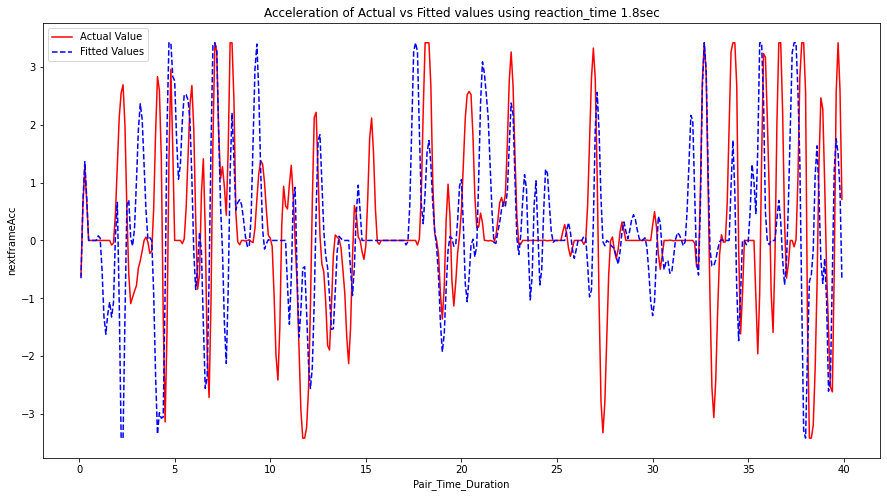

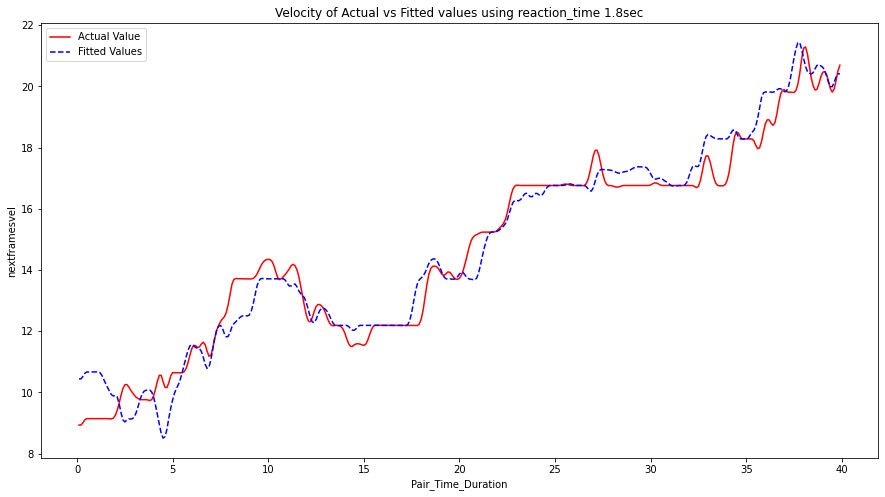

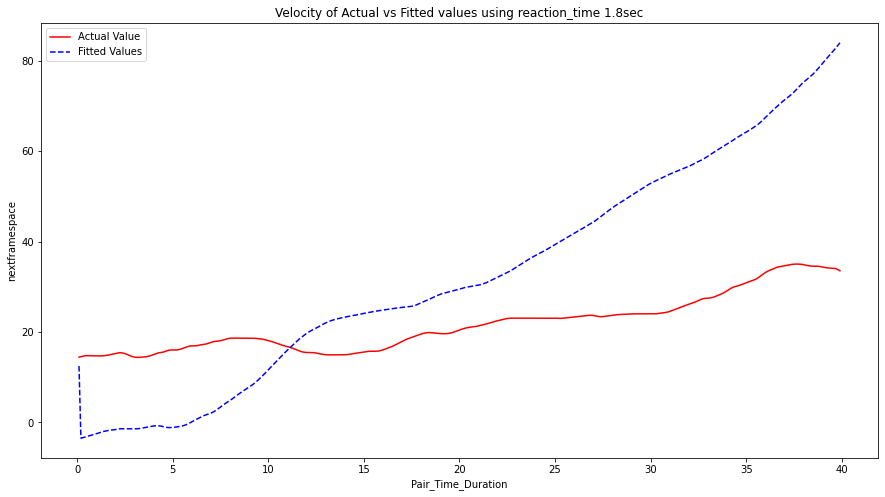

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
# '13-22', '10-12', '23-27', '39-43', '76-83', '84-94'
F4 = P_18[P_18["L-F_Pair"] == "13-22"]
model.plot_1(F4,'nextframeAcc','preceding_Vehicle_Acceleration','Acceleration of Actual vs Fitted values using reaction_time 1.8sec')
model.plot_1(F4,'nextframesvel','preceding_Vehicle_Velocity', 'Velocity of Actual vs Fitted values using reaction_time 1.8sec')
model.plot_1(F4,'nextframespace','predicted_spacing', 'Velocity of Actual vs Fitted values using reaction_time 1.8sec')

# Resolution 1.9

In [7]:
ngsim = model.preprocessing(ngsim1,1.9)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
p= model.prediction_test_pairs(test,0,6)
print(p)
P_19 = model.prediction(test,p,rf,1.9)

['13-22', '9-20', '10-12', '23-27', '39-43', '76-83']
j: 0 input:[[12.489688  2.        2.       -1.018032  9.424416]],subject localy:10.498836,preceding_local_y:27.5106384,spacing:12.489688 pred_acc: -0.05277103999999998
j: 1 input:[[-4.28695947  2.          2.         -1.11829698  9.32415102]],subject localy:28.3099746728,preceding_local_y:28.5442152,spacing:-4.2869594728 pred_acc: 0.27740864000000026
j: 2 input:[[-4.17956482  2.          2.         -1.16675611  9.35189189]],subject localy:29.2437768184,preceding_local_y:29.585412,spacing:-4.179564818399999 pred_acc: -0.36714175999999954
j: 3 input:[[-4.0506903   2.          2.         -1.30710229  9.31517771]],subject localy:30.1771302984,preceding_local_y:30.64764,spacing:-4.050690298400003 pred_acc: -0.005445760000000071
j: 4 input:[[-3.91050404  2.          2.         -1.35336686  9.31463314]],subject localy:31.1086208408,preceding_local_y:31.7193168,spacing:-3.9105040407999994 pred_acc: -0.17091152000000004
j: 5 input:[[-3.77461

# Resolution 2

In [8]:
ngsim = model.preprocessing(ngsim1,2)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
p= model.prediction_test_pairs(test,0,6)
print(p)
P_2 = model.prediction(test,p,rf,2)

['13-22', '9-20', '10-12', '23-27', '39-43', '76-83']
j: 0 input:[[12.489688  2.        2.       -1.018032  9.424416]],subject localy:10.498836,preceding_local_y:27.5106384,spacing:12.489688 pred_acc: 0.42141648
j: 1 input:[[-6.16748576  2.          2.         -0.17519904 10.26724896]],subject localy:30.19050096,preceding_local_y:28.5442152,spacing:-6.167485760000002 pred_acc: 0.5110683200000005
j: 2 input:[[-6.1555692   2.          2.         -0.20029221 10.31835579]],subject localy:31.2197811976,preceding_local_y:29.585412,spacing:-6.155569197599998 pred_acc: 0.11724639999999999
j: 3 input:[[-6.12576301  2.          2.         -0.29219957 10.33008043]],subject localy:32.2522030088,preceding_local_y:30.64764,spacing:-6.1257630088000035 pred_acc: 1.2970255999999998
j: 4 input:[[-6.09357938  2.          2.         -0.20821701 10.45978299]],subject localy:33.29169618,preceding_local_y:31.7193168,spacing:-6.093579380000001 pred_acc: -0.11003279999999999
j: 5 input:[[-6.07251232  2.       

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_1(df, df1, df2, title, nextframe, prediction):
    plt.figure(figsize=(15, 8))
    ax = sns.lineplot(x=df["Pair_Time_Duration"],
                      y=df[nextframe], color="r", label="Actual Value", ci=None)
    sns.lineplot(x=df["Pair_Time_Duration"],
                 y=df[prediction],  color="b", label="Fitted Values 1.8", linestyle='--', ci=None)
    sns.lineplot(x=df1["Pair_Time_Duration"],
                      y=df1[prediction], color="black", label="Fitted Values 1.9", linestyle='--', ci=None)
    sns.lineplot(x=df2["Pair_Time_Duration"],
                 y=df2[prediction],  color="green", label="Fitted Values 2", linestyle='--', ci=None)

    plt.title(title)
    plt.show()
    plt.close()
    return plt

### Velocity Plot

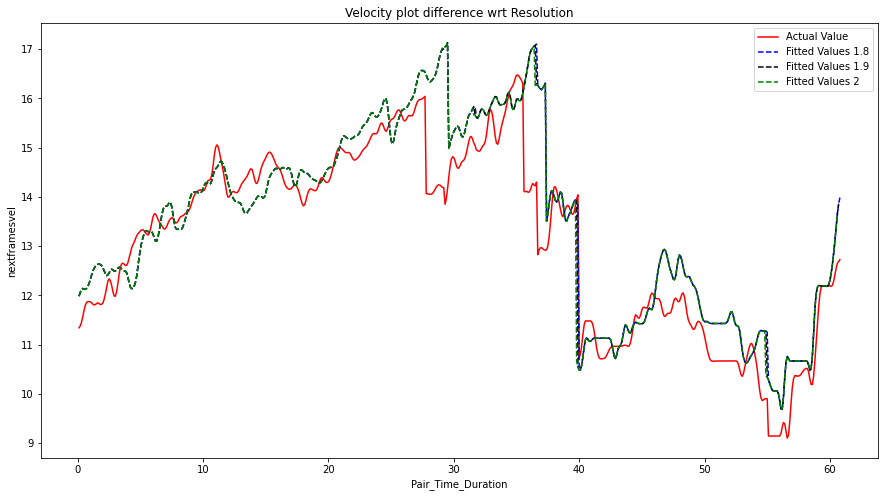

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [57]:
plot_1(P_18, P_19, P_2, "Velocity plot difference wrt Resolution", "nextframesvel", "preceding_Vehicle_Velocity")

### Spacing Plot

In [13]:
from sklearn.metrics import r2_score

In [20]:
def R2_score(df, nextframe, prediction):
    R2 = r2_score(df[nextframe], df[prediction])
    return R2

In [26]:
# resolution 1.8
print(R2_score(P_18, "nextframesvel", "preceding_Vehicle_Velocity" ))
print(R2_score(P_18, "nextframeAcc", "preceding_Vehicle_Acceleration" ))
print(R2_score(P_18, "nextframespace", "predicted_spacing" ))

0.7111477330788253
-0.952013631626915
-369.02993715130225


In [27]:
# resolution 1.9
print(R2_score(P_19, "nextframesvel", "preceding_Vehicle_Velocity" ))
print(R2_score(P_19, "nextframeAcc", "preceding_Vehicle_Acceleration" ))
print(R2_score(P_19, "nextframespace", "predicted_spacing" ))

0.7023055168978798
-0.921520785059093
-467.44793264486447


In [28]:
# resolution 2
print(R2_score(P_2, "nextframesvel", "preceding_Vehicle_Velocity" ))
print(R2_score(P_2, "nextframeAcc", "preceding_Vehicle_Acceleration" ))
print(R2_score(P_2, "nextframespace", "predicted_spacing" ))

0.6931192046738339
-0.8865133090973722
-385.65675216777254


In [59]:
test.columns

Index(['Vehicle_ID', 'Frame_ID', 'Global_Time', 'Local_X', 'Local_Y',
       'v_length', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceding',
       'Following', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'Front_To_Rear_Time_Headway', 'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'v_Class_Name', 'Vehicle_combination', 'preceding_vehicle_length',
       'lane_changes', 'Prec_Vehicle_ID', 'preceding_Vehicle_Velocity',
       'preceding_Vehicle_Acceleration', 'preceding_car_lane_changes',
       'preceding_Local_Y', 'preceding_v_Class', 'pair_Time_Duration',
       'total_pair_duration', 'nextframeAcc', 'nextframesvel',
       'nextframeposition', 'nextframespace', 'Pair_Time_Duration',
       'PrecVehType', 'Vehicle.type'],
      dtype='object')

In [61]:
train.Vehicle_combination.unique()

array(['Free Flow-Car', 'Car-Car', 'Car-Heavy Vehicle',
       'Heavy Vehicle-Car', 'Car-Motorcycle', 'Motorcycle-Car',
       'Heavy Vehicle-Motorcycle'], dtype=object)

In [62]:
test.Vehicle_combination.unique()

array(['Car-Car', 'Free Flow-Car', 'Car-Heavy Vehicle',
       'Heavy Vehicle-Car'], dtype=object)

### H-C pair for resolution 1.9

In [114]:
test_HC = test[test["Vehicle_combination"]=="Heavy Vehicle-Car"]

In [115]:
test_HC["L-F_Pair"].unique()

array(['2330-2335', '216-232', '422-430', '442-436'], dtype=object)

In [83]:
ngsim = model.preprocessing(ngsim1,1.9)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)

P_19_HC = model.prediction(test,['2225-2232'],rf,1.9)

IndexError: single positional indexer is out-of-bounds

In [123]:
P_19_HC = model.prediction(test,['422-430'],rf,1.9)

j: 0 input:[[ 8.74776   3.        2.       -2.048256  4.867656]],subject localy:20.5947264,preceding_local_y:37.5099072,spacing:8.74776 pred_acc: 0.5106009600000001
j: 1 input:[[-0.76222433  3.          2.         -0.91657018  5.83779782]],subject localy:30.7649075328,preceding_local_y:38.1713232,spacing:-0.7622243327999954 pred_acc: -0.46433232000000063
j: 2 input:[[-0.67556085  3.          2.         -0.92642741  5.79136459]],subject localy:31.3463656536,preceding_local_y:38.8394448,spacing:-0.6755608535999968 pred_acc: -0.3778707200000005
j: 3 input:[[-0.56944636  3.          2.         -0.89715848  5.75357752]],subject localy:31.9236127592,preceding_local_y:39.52280640000001,spacing:-0.5694463591999934 pred_acc: -1.2258852799999995
j: 4 input:[[-0.46902908  3.          2.         -0.81553101  5.63098899]],subject localy:32.4928410848,preceding_local_y:40.192452,spacing:-0.4690290847999954 pred_acc: -2.1007832000000004
j: 5 input:[[-0.39800327  3.          2.         -0.79091333  5.

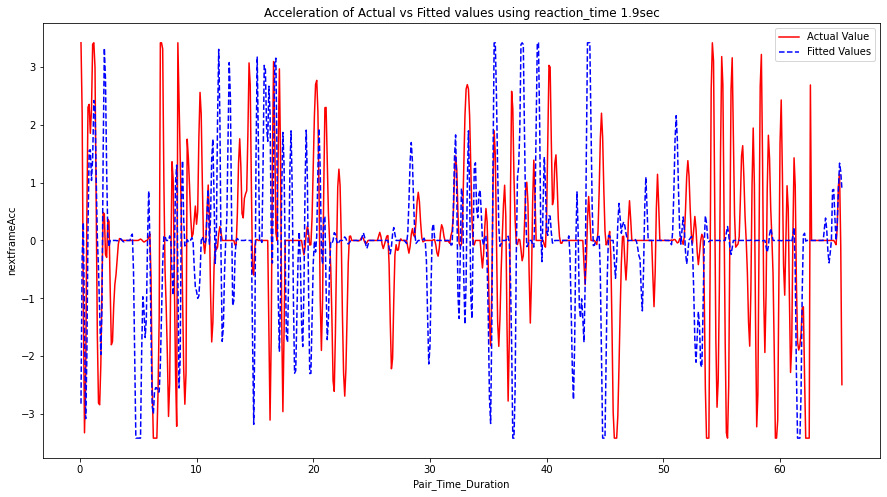

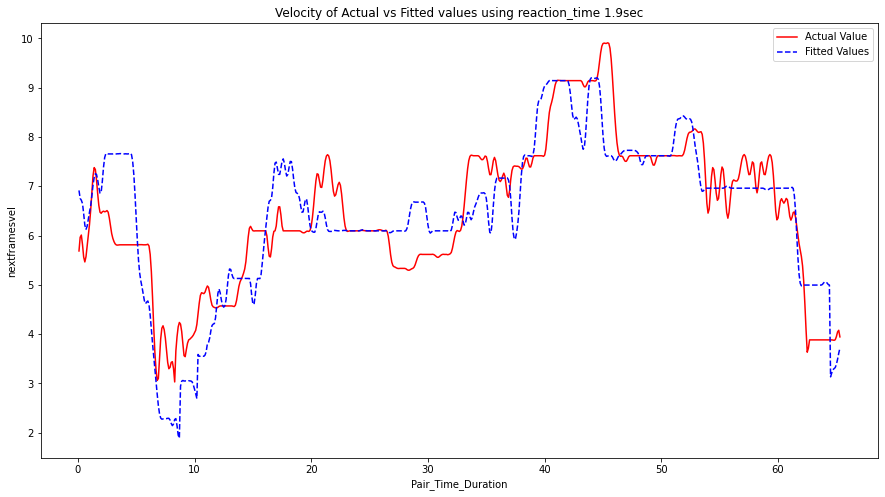

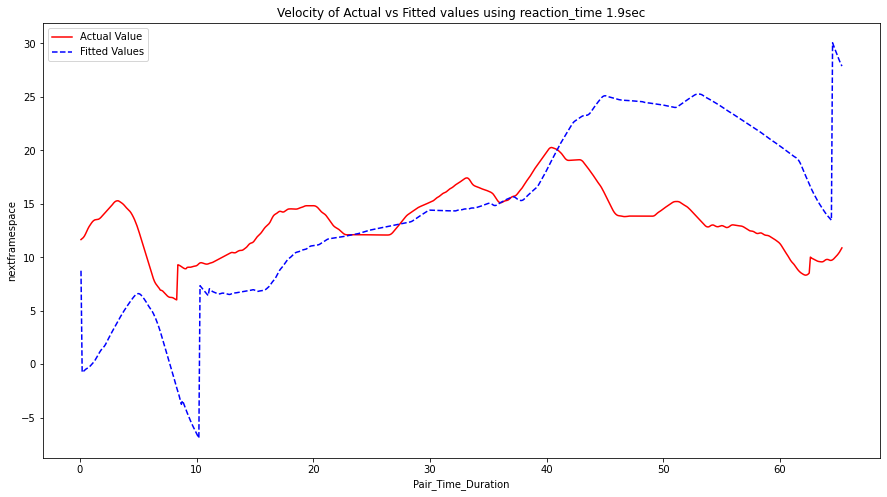

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [124]:

model.plot_1(P_19_HC,'nextframeAcc','preceding_Vehicle_Acceleration','Acceleration of Actual vs Fitted values using reaction_time 1.9sec')
model.plot_1(P_19_HC,'nextframesvel','preceding_Vehicle_Velocity', 'Velocity of Actual vs Fitted values using reaction_time 1.9sec')
model.plot_1(P_19_HC,'nextframespace','predicted_spacing', 'Velocity of Actual vs Fitted values using reaction_time 1.9sec')

### H-C pair for resolution 1.9

In [139]:
test_HC = test[test["Vehicle_combination"]=="Heavy Vehicle-Car"]["L-F_Pair"].unique()

In [140]:
test_HC = test[test["Vehicle_combination"]=="Heavy Vehicle-Car"]

In [141]:
test_HC["L-F_Pair"].unique()

array(['2330-2335', '216-232', '422-430', '442-436'], dtype=object)

In [142]:
ngsim = model.preprocessing(ngsim1,1.9)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
P_19_HC = model.prediction(test,["2330-2335"],rf,1.9)

j: 0 input:[[15.218664  3.        2.       -1.901952  9.144   ]],subject localy:24.031956,preceding_local_y:45.9559152,spacing:15.218664000000004 pred_acc: 1.5207487999999998
j: 1 input:[[-3.79132998  3.          2.          1.13072672 12.03342272]],subject localy:44.150507583999996,preceding_local_y:47.064777600000006,spacing:-3.791329983999989 pred_acc: -0.38530784000000023
j: 2 input:[[-3.90857212  3.          2.          1.32079594 11.99489194]],subject localy:45.3519233168,preceding_local_y:48.1489512,spacing:-3.9085721167999976 pred_acc: -0.19358863999999987
j: 3 input:[[-4.05309497  3.          2.          1.56356507 11.97553307]],subject localy:46.550444567199996,preceding_local_y:49.2029496,spacing:-4.053094967199999 pred_acc: -0.3789070399999999
j: 4 input:[[-4.22432094  3.          2.          1.75122637 11.93764237]],subject localy:47.7461033392,preceding_local_y:50.2273824,spacing:-4.224320939199994 pred_acc: 0.054660799999999996
j: 5 input:[[-4.41495688  3.          2.   

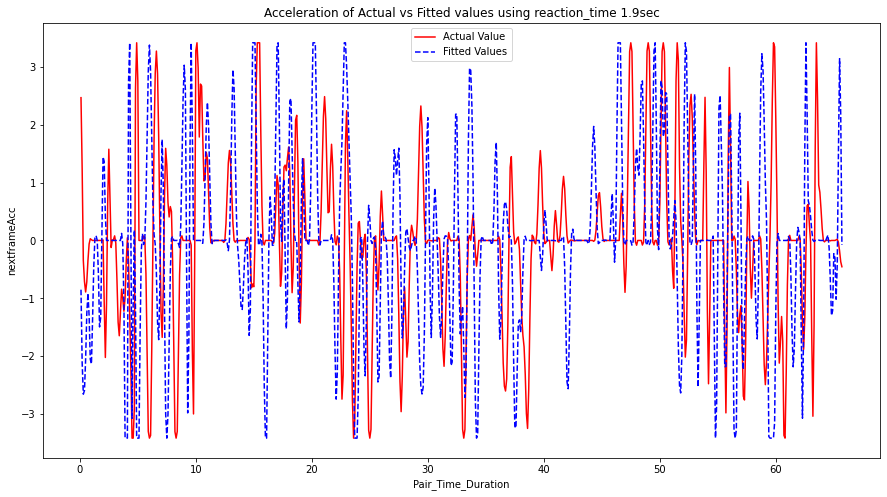

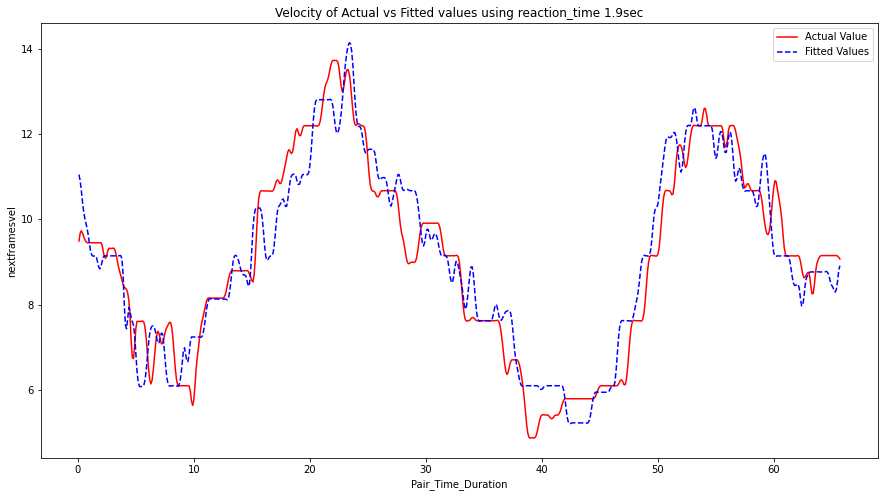

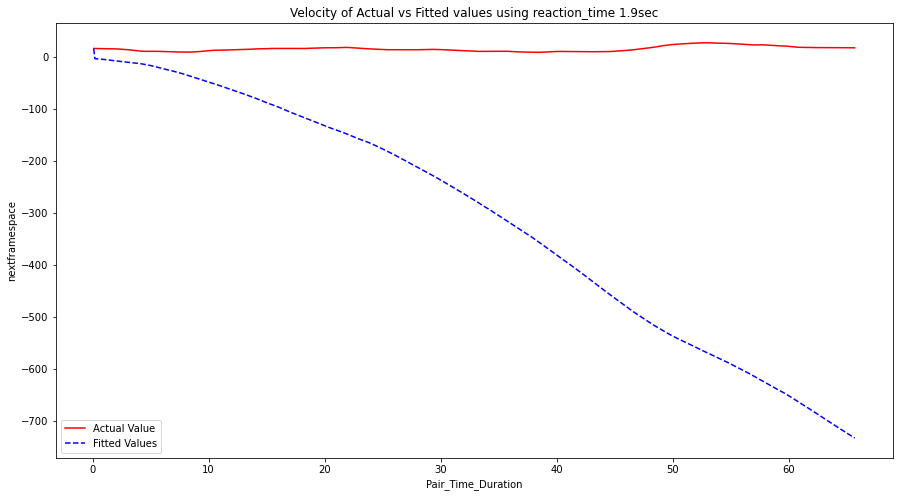

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [144]:
P_19_HC = P_19_HC[P_19_HC["L-F_Pair"] == "2330-2335"]
model.plot_1(P_19_HC,'nextframeAcc','preceding_Vehicle_Acceleration','Acceleration of Actual vs Fitted values using reaction_time 1.9sec')
model.plot_1(P_19_HC,'nextframesvel','preceding_Vehicle_Velocity', 'Velocity of Actual vs Fitted values using reaction_time 1.9sec')
model.plot_1(P_19_HC,'nextframespace','predicted_spacing', 'Velocity of Actual vs Fitted values using reaction_time 1.9sec')

In [145]:
ngsim = model.preprocessing(ngsim1,0.4)
train_pair = model.select_training_pairs(ngsim)
train,test = model.split_df_into_train_test(ngsim,train_pair)
X_train, y_train, X_test, y_test,rf = model.fit_rfmodel(train,test,150)
P_4_HC = model.prediction(test,["2330-2335"],rf,0.4)

j: 0 input:[[15.218664  3.        2.       -1.901952  9.144   ]],subject localy:24.031956,preceding_local_y:45.9559152,spacing:15.218664000000004 pred_acc: 0.4155440000000005
j: 1 input:[[12.63637808  3.          2.         -1.5924784   9.3102176 ]],subject localy:27.722799520000002,preceding_local_y:47.064777600000006,spacing:12.636378080000004 pred_acc: 0.7071359999999997
j: 2 input:[[12.78599424  3.          2.         -1.2931648   9.3809312 ]],subject localy:28.65735696,preceding_local_y:48.1489512,spacing:12.785994239999997 pred_acc: 1.1078057599999993
j: 3 input:[[12.89636049  3.          2.         -0.92025622  9.49171178]],subject localy:29.6009891088,preceding_local_y:49.2029496,spacing:12.896360491199996 pred_acc: 1.2867030400000004
j: 4 input:[[12.9651886   3.          2.         -0.56603392  9.62038208]],subject localy:30.556593801600002,preceding_local_y:50.2273824,spacing:12.965188598400001 pred_acc: 0.36114735999999986
j: 5 input:[[13.00474625  3.          2.         -0.

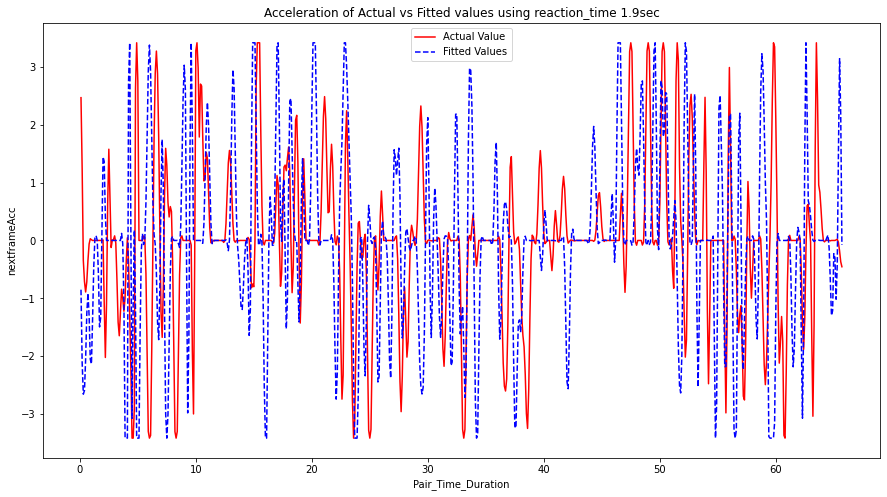

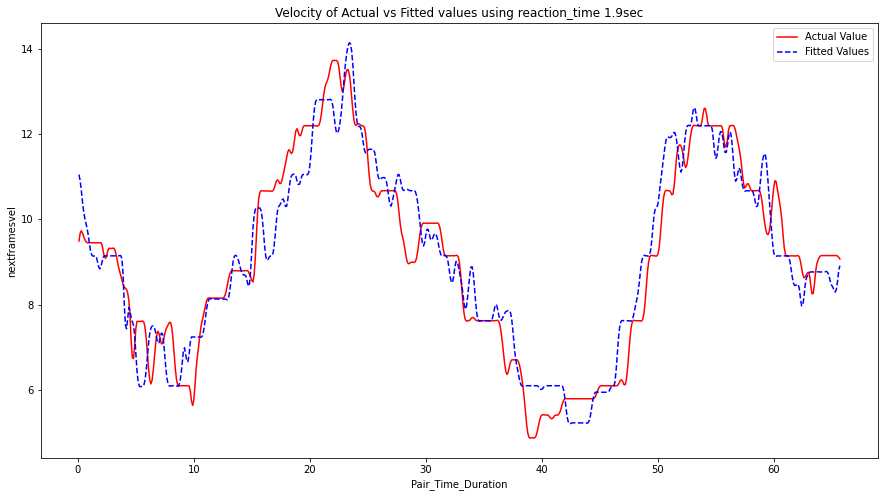

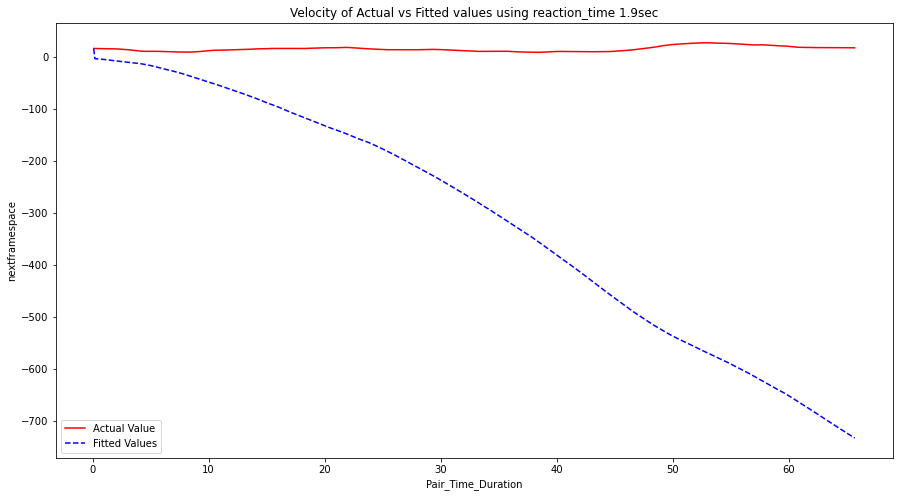

<module 'matplotlib.pyplot' from 'c:\\Users\\rakes\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [146]:
P_4_HC = P_4_HC[P_4_HC["L-F_Pair"] == "2330-2335"]
model.plot_1(P_19_HC,'nextframeAcc','preceding_Vehicle_Acceleration','Acceleration of Actual vs Fitted values using reaction_time 1.9sec')
model.plot_1(P_19_HC,'nextframesvel','preceding_Vehicle_Velocity', 'Velocity of Actual vs Fitted values using reaction_time 1.9sec')
model.plot_1(P_19_HC,'nextframespace','predicted_spacing', 'Velocity of Actual vs Fitted values using reaction_time 1.9sec')